## Libraries

In [47]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Obtain the bssid_id number of the ssid name: eduroam & ditwifi

In [48]:
# Read CSV file of DIT BSSID
df1_bssid = pd.read_csv("DIT_BSSID.csv")

# Make a copy
df_bssid = df1_bssid.copy()
df_bssid_eduroam = df1_bssid.copy()
df_bssid_ditwifi = df1_bssid.copy()

# Extract from CSV file the 'bssid_id' numbers of the ssid = 'eduroam' & ssid = 'ditwifi'
# 1st drop unnnecesary data
df_bssid.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)
df_bssid_ditwifi.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)
df_bssid_eduroam.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)

# 2nd get only values of bssid_id of the ssid: 'eduroam' and 'ditwifi'
df_bssid_eduroam = df_bssid_eduroam[df_bssid_eduroam["ssid"] == 'eduroam']
df_bssid_ditwifi = df_bssid_ditwifi[df_bssid_ditwifi["ssid"] == 'ditwifi']
df_bssid = df_bssid[(df_bssid["ssid"] == 'eduroam') | (df_bssid['ssid'] == 'ditwifi')]

df_bssid_eduroam


,bssid_id,ssid
98,20522,eduroam
196,43718,eduroam
204,43822,eduroam
209,44210,eduroam
226,44667,eduroam
...,...,...
4151,77087,eduroam
4168,77104,eduroam
4188,77124,eduroam
4241,77177,eduroam


### Obtain form CSV DIT_AP_Traffic_Class the 'monitor_radio_id' that corresponds to the 'bssid_id' of 'eduroam' and 'ditwifi'
* Info: https://es.acervolima.com/python-pandas-dataframe-isin/

In [49]:
# Read CSV file of DIT BSSID
df1_traffic_class = pd.read_csv("DIT_AP_Traffic_Class.csv")

# Make a copy
df_traffic_class = df1_traffic_class.copy()
df_traffic_class_eduroam = df1_traffic_class.copy()
df_traffic_class_ditwifi = df1_traffic_class.copy()

# 1st drop unnnecesary data
df_traffic_class.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)
df_traffic_class_eduroam.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)
df_traffic_class_ditwifi.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)

# 2nd only get the 'monitor_radio_id' that agree with the bssi_id of: 'eduroam' & 'ditwifi'
bssid_id = df_bssid["bssid_id"]
bssid_id_eduroam = df_bssid_eduroam["bssid_id"]
bssid_id_ditwifi = df_bssid_ditwifi["bssid_id"]

# Filter
df_traffic_class_filter = df_traffic_class[df_traffic_class["bssid_id"].isin(bssid_id)]
df_traffic_class_eduroam_filter = df_traffic_class_eduroam[df_traffic_class_eduroam["bssid_id"].isin(bssid_id_eduroam)]
df_traffic_class_ditwifi_filter = df_traffic_class_ditwifi[df_traffic_class_ditwifi["bssid_id"].isin(bssid_id_ditwifi)]

# Show data frame
df_traffic_class_ditwifi

,bssid_id,monitor_radio_id
0,74167,1126
1,74167,1126
2,74184,1126
3,74186,1126
4,74173,1126
...,...,...
472382,74271,1137
472383,74271,1137
472384,74273,1137
472385,74273,1137


In [50]:
# Show data frame
df_traffic_class_ditwifi_filter

,bssid_id,monitor_radio_id
3,74186,1126
5,74171,1126
7,74210,1138
8,74212,1138
9,74212,1138
...,...,...
472379,74276,1137
472382,74271,1137
472383,74271,1137
472384,74273,1137


### Repeat with DIT_Channel.csv
* Now with monitor_radio_id

In [51]:
# Read CSV file of DIT BSSID
df1_channel = pd.read_csv("DIT_Channel.csv")

# Make a copy
df_channel = df1_channel.copy()
df_channel_eduroam = df1_channel.copy()
df_channel_ditwifi = df1_channel.copy()

# Filter data of random days (22,23, 24 and 25 -08-2022) only created in the afternoons (15h-21h)
df_channel = df_channel[((df_channel['created_at'] > '2018-05-21 15:00:00') & (df_channel['created_at'] <= '2018-05-21 21:00:00')) |
((df_channel['created_at'] > '2018-05-22 15:00:00') & (df_channel['created_at'] <= '2018-05-22 21:00:00')) |
((df_channel['created_at'] > '2018-05-23 15:00:00') & (df_channel['created_at'] <= '2018-05-23 21:00:00')) |
((df_channel['created_at'] > '2018-05-24 15:00:00') & (df_channel['created_at'] <= '2018-05-24 21:00:00')) |
((df_channel['created_at'] > '2018-05-25 15:00:00') & (df_channel['created_at'] <= '2018-05-25 21:00:00'))]

df_channel_eduroam = df_channel_eduroam[((df_channel['created_at'] > '2018-05-21 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-21 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-22 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-22 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-23 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-23 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-24 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-24 15:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-25 07:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-25 15:00:00'))]

df_channel_ditwifi = df_channel_ditwifi[((df_channel_ditwifi['created_at'] > '2018-05-21 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-21 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-22 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-22 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-23 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-23 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-24 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-24 15:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-25 07:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-25 15:00:00'))]

# 1st drop unnnecesary data (All except monitor_radio_id, bw_busy and total_devices)
df_channel.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)

df_channel_eduroam.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)

df_channel_ditwifi.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)


# 2nd only get the 'monitor_radio_id' that agree with the bssi_id of: 'eduroam' & 'ditwifi'
df_channel_ditwifi


,monitor_radio_id,bw_busy,total_devices
16485,1122,0.0267,18
16486,1122,0.1119,26
16487,1122,0.0788,17
16488,1122,0.0768,11
16489,1122,0.0741,16
...,...,...,...
427307,1160,0.1278,44
427308,1160,0.1573,50
427309,1160,0.2360,43
427310,1160,0.1243,40


In [52]:
# Save monitor_radio_id
monitor_radio_id_traffic = df_traffic_class_filter["monitor_radio_id"]
monitor_radio_id_traffic_eduroam = df_traffic_class_eduroam_filter["monitor_radio_id"]
monitor_radio_id_traffic_ditwifi = df_traffic_class_ditwifi_filter["monitor_radio_id"]

# Filter table by monitor_radio_id 
df_channel_filter = df_channel[df_channel["monitor_radio_id"].isin(monitor_radio_id_traffic)]
df_channel_eduroam_filter = df_channel_eduroam[df_channel_eduroam["monitor_radio_id"].isin(monitor_radio_id_traffic_eduroam)]
df_channel_ditwifi_filter = df_channel_ditwifi[df_channel_ditwifi["monitor_radio_id"].isin(monitor_radio_id_traffic_ditwifi)]

# Show data frame
df_channel_ditwifi

,monitor_radio_id,bw_busy,total_devices
16485,1122,0.0267,18
16486,1122,0.1119,26
16487,1122,0.0788,17
16488,1122,0.0768,11
16489,1122,0.0741,16
...,...,...,...
427307,1160,0.1278,44
427308,1160,0.1573,50
427309,1160,0.2360,43
427310,1160,0.1243,40


In [53]:
# Show data frame
df_channel_filter

,monitor_radio_id,bw_busy,total_devices
17300,1122,0.0524,36
17301,1122,0.1129,50
17302,1122,0.2227,58
17303,1122,0.1394,42
17304,1122,0.0251,38
...,...,...,...
427656,1160,0.1144,30
427657,1160,0.1311,19
427658,1160,0.0625,11
427659,1160,0.1067,20


### Remove categorical data

In [54]:
# Save monitor_radio_id
monitor_radio_id_channel = df_channel_filter["monitor_radio_id"]
monitor_radio_id_channel_eduroam = df_channel_eduroam_filter["monitor_radio_id"]
monitor_radio_id_channel_ditwifi = df_channel_ditwifi_filter["monitor_radio_id"]


# Drop categorical data
df_channel_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)
df_channel_eduroam_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)
df_channel_ditwifi_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)

# Show data frame
df_channel_filter

,bw_busy,total_devices
17300,0.0524,36
17301,0.1129,50
17302,0.2227,58
17303,0.1394,42
17304,0.0251,38
...,...,...
427656,0.1144,30
427657,0.1311,19
427658,0.0625,11
427659,0.1067,20


### DBSCAN (Eduroam)
* For random eps value and min_samples value 

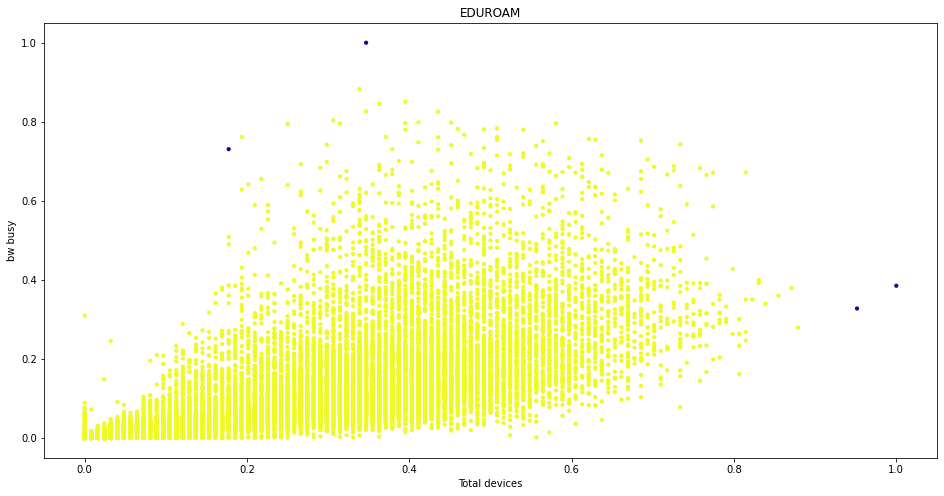

In [55]:
# Normalize
min_max_scaler_eduroam = preprocessing.MinMaxScaler()
df_escalado_eduroam = min_max_scaler_eduroam.fit_transform(df_channel_eduroam_filter)
df_escalado_eduroam = pd.DataFrame(df_escalado_eduroam)
df_escalado_eduroam = df_escalado_eduroam.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan_eduroam = DBSCAN(eps= 0.08, min_samples= 4).fit(df_escalado_eduroam)
cluster_eduroam = dbscan_eduroam.fit_predict(df_escalado_eduroam)

# Add to dataFrame
df_channel_eduroam_filter['Cluster'] = cluster_eduroam

# Asign x and y
x = df_escalado_eduroam['total_devices'].values # total_devices
y = df_escalado_eduroam['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("EDUROAM")
plt.scatter(x, y, c = cluster_eduroam, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot


### DBSCAN (Ditwifi)
* For random eps value and min_samples value 

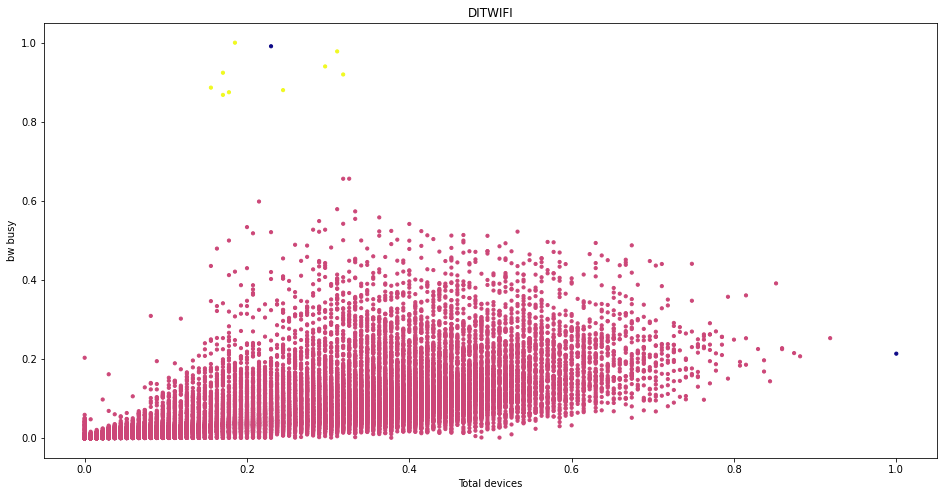

In [56]:
# Normalize
min_max_scaler_ditwifi = preprocessing.MinMaxScaler()
df_escalado_ditwifi = min_max_scaler_ditwifi.fit_transform(df_channel_ditwifi_filter)
df_escalado_ditwifi = pd.DataFrame(df_escalado_ditwifi)
df_escalado_ditwifi = df_escalado_ditwifi.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan_ditwifi = DBSCAN(eps= 0.08, min_samples= 4).fit(df_escalado_ditwifi)
cluster_ditwifi = dbscan_ditwifi.fit_predict(df_escalado_ditwifi)

# Add to dataFrame
df_channel_ditwifi_filter['Cluster'] = cluster_ditwifi

# Asign x and y
x = df_escalado_ditwifi['total_devices'].values # total_devices
y = df_escalado_ditwifi['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("DITWIFI")
plt.scatter(x, y, c = cluster_ditwifi, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### DBSCAN (Eduroam & Ditwifi)
* For random eps value and min_samples value

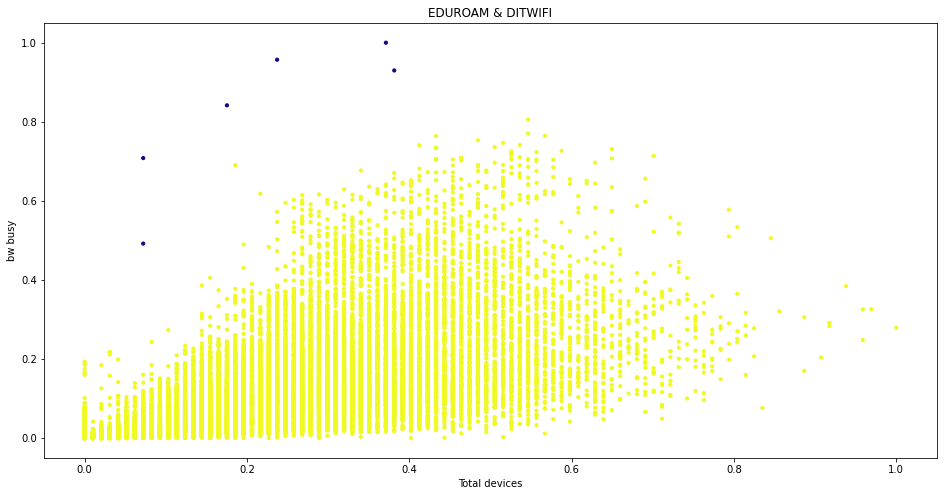

In [57]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
df_escalado = min_max_scaler.fit_transform(df_channel_filter)
df_escalado = pd.DataFrame(df_escalado)
df_escalado = df_escalado.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan = DBSCAN(eps= 0.08, min_samples= 4).fit(df_escalado)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_channel_filter['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("EDUROAM & DITWIFI")
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Determining the correct epsilon (Eduroam)
* The epsilon and min_samples are random values
* To determine the correct epsilon --> elbow method
* Determine a number of min_sample:
    * If the dataset has two dimensions, use the min sample per cluster as 4. (Ester et al., 1996)
    * If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension. (Sander et al., 1998)

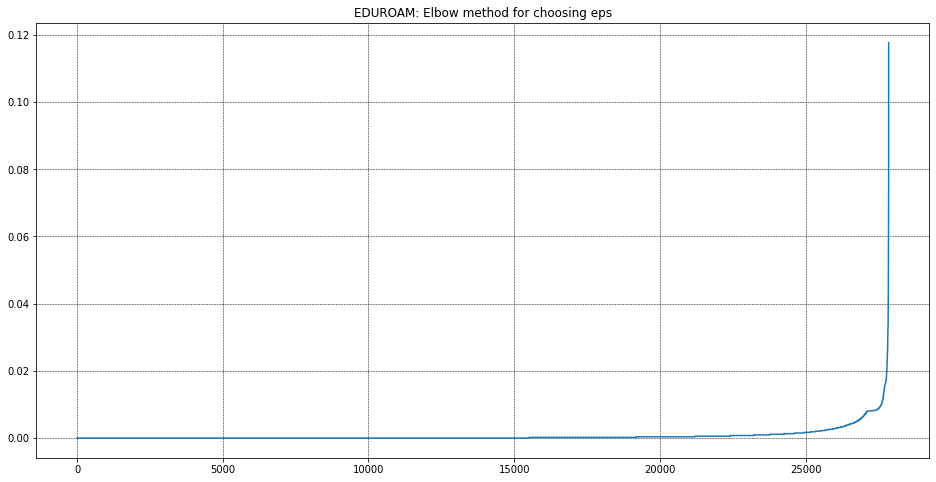

In [58]:
from sklearn.neighbors import NearestNeighbors
# min_samples
n_eduroam = 4

# Calculate avg. distance between each point in the data set
neighbours_eduroam = NearestNeighbors(n_neighbors=n_eduroam+1)
neighbors_fit_eduroam = neighbours_eduroam.fit(df_escalado_eduroam)
distances_eduroam, indices_eduroam = neighbors_fit_eduroam.kneighbors(df_escalado_eduroam)
distances_eduroam = np.sort(distances_eduroam[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("EDUROAM: Elbow method for choosing eps")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances_eduroam)

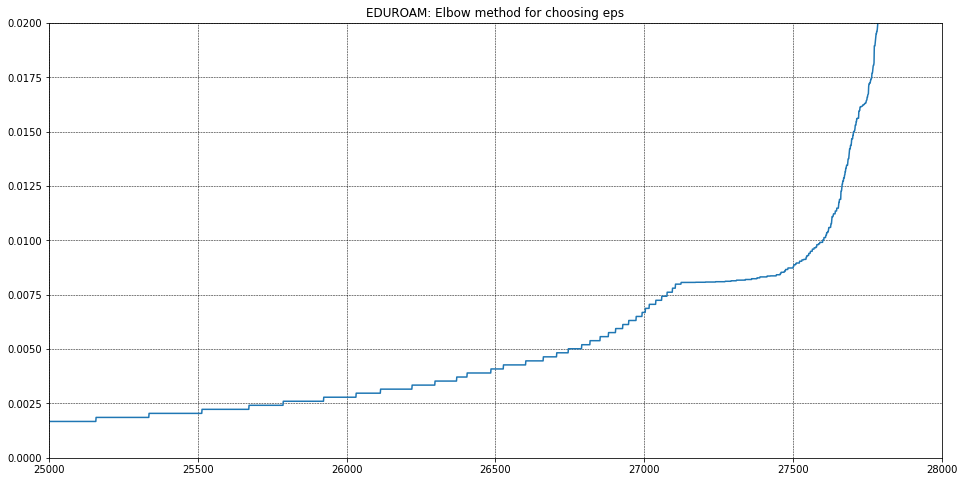

In [59]:
#Expand image (Eduroam)
# Calculate avg. distance between each point in the data set
neighbours_eduroam = NearestNeighbors(n_neighbors=n_eduroam+1)
neighbors_fit_eduroam = neighbours_eduroam.fit(df_escalado_eduroam)
distances_eduroam, indices_eduroam = neighbors_fit_eduroam.kneighbors(df_escalado_eduroam)
distances_eduroam = np.sort(distances_eduroam[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("EDUROAM: Elbow method for choosing eps")
plt.ylim(0, 0.02)
plt.xlim(25000, 28000)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances_eduroam)

### Determining the correct epsilon (Eduroam)
* The epsilon and min_samples are random values
* To determine the correct epsilon --> elbow method
* Determine a number of min_sample:
    * If the dataset has two dimensions, use the min sample per cluster as 4. (Ester et al., 1996)
    * If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension. (Sander et al., 1998)

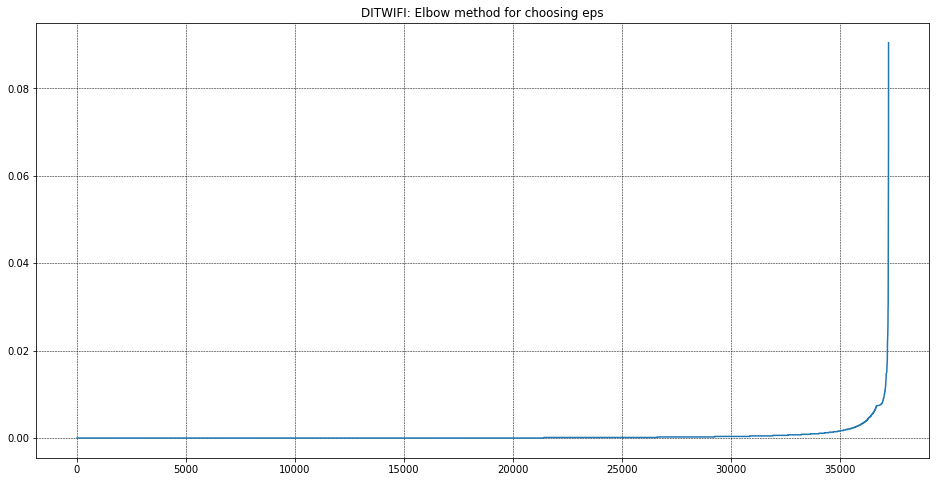

In [60]:
# min_samples
n_ditwifi = 4

# Calculate avg. distance between each point in the data set
neighbours_ditwifi = NearestNeighbors(n_neighbors=n_ditwifi+1)
neighbors_fit_ditwifi = neighbours_ditwifi.fit(df_escalado_ditwifi)
distances_ditwifi, indices_ditwifi = neighbors_fit_ditwifi.kneighbors(df_escalado_ditwifi)
distances_ditwifi = np.sort(distances_ditwifi[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("DITWIFI: Elbow method for choosing eps")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances_ditwifi)

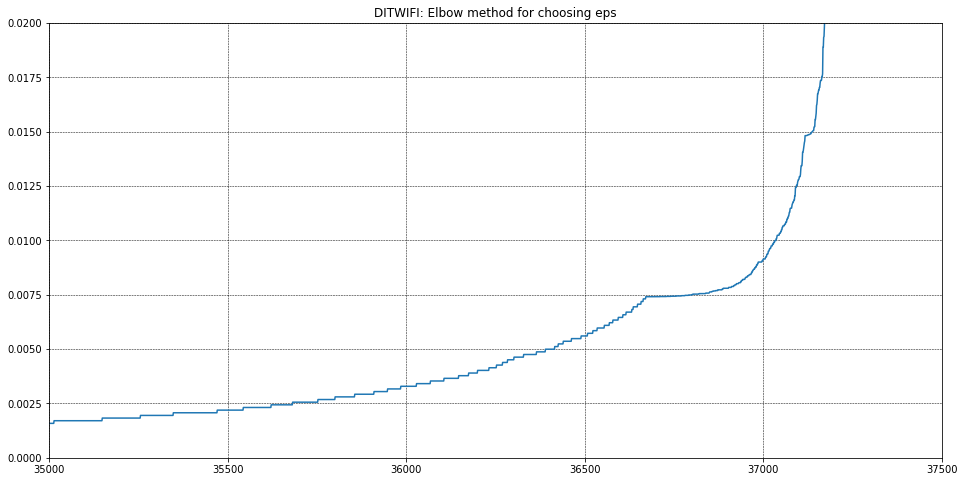

In [61]:
#Expand image (Ditwifi)
# Calculate avg. distance between each point in the data set
neighbours_ditwifi = NearestNeighbors(n_neighbors=n_ditwifi+1)
neighbors_fit_ditwifi = neighbours_ditwifi.fit(df_escalado_ditwifi)
distances_ditwifi, indices_ditwifi = neighbors_fit_ditwifi.kneighbors(df_escalado_ditwifi)
distances_ditwifi = np.sort(distances_ditwifi[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("DITWIFI: Elbow method for choosing eps")
plt.ylim(0, 0.02)
plt.xlim(35000, 37500)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances_ditwifi)

### Determining the correct epsilon (Eduroam & Ditwifi)
* The epsilon and min_samples are random values
* To determine the correct epsilon --> elbow method
* Determine a number of min_sample:
    * If the dataset has two dimensions, use the min sample per cluster as 4. (Ester et al., 1996)
    * If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension. (Sander et al., 1998)

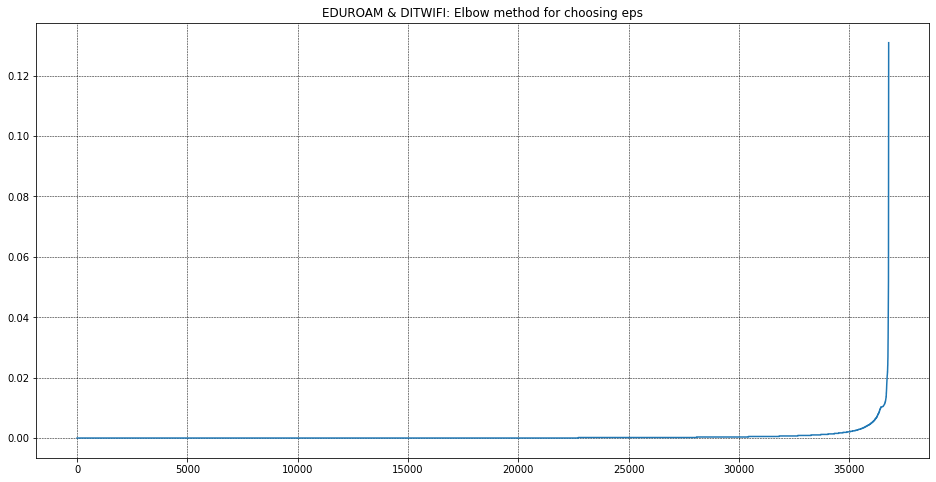

In [62]:
# min_samples
n = 4

# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n+1)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("EDUROAM & DITWIFI: Elbow method for choosing eps")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

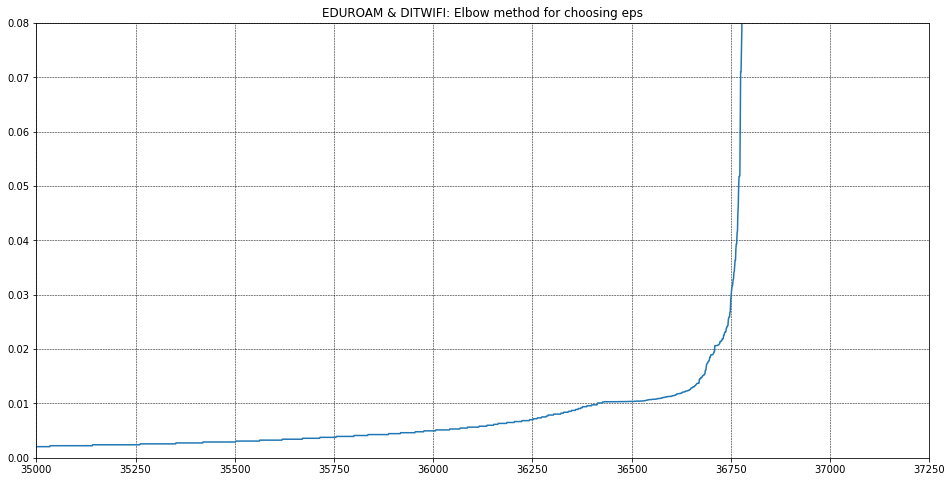

In [63]:
# Expand image (Eduroam & Ditwifi)
# Calculate avg. distance between each point in the data set
neighbours = NearestNeighbors(n_neighbors=n+1)
neighbors_fit = neighbours.fit(df_escalado)
distances, indices = neighbors_fit.kneighbors(df_escalado)
distances = np.sort(distances[:,1], axis=0) #To obtain the distance of the sorted distances

# Plot
plt.figure(figsize=(16,8))
plt.title("EDUROAM & DITWIFI: Elbow method for choosing eps")
plt.ylim(0, 0.08)
plt.xlim(35000, 37250)
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.plot(distances)

### Compare different epsilons (Eduroam)
* eps = 0.0025
* eps = 0.0125

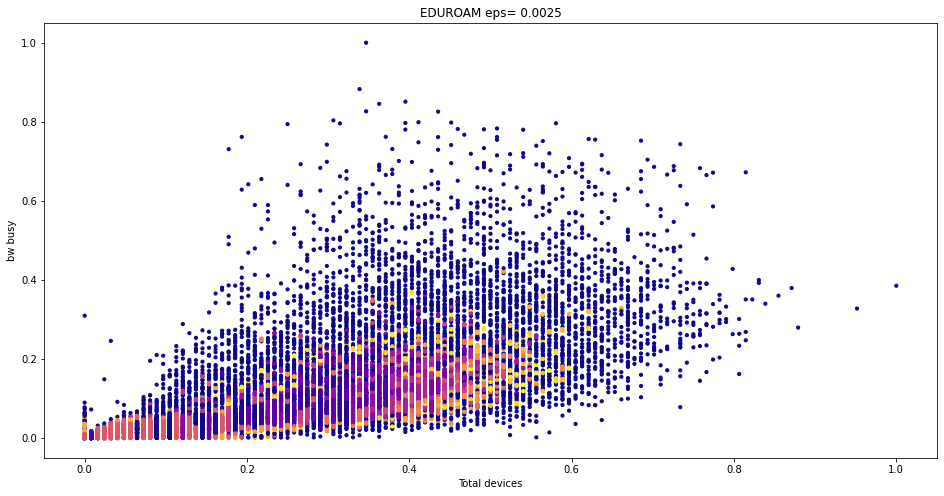

In [64]:
# 1st try with eps = 0.008
# Epsilon 
e_eduroam = 0.0025

# DBSCAN
dbscan_eduroam = DBSCAN(eps= e_eduroam, min_samples= n_eduroam)
cluster_eduroam = dbscan_eduroam.fit_predict(df_escalado_eduroam)

# Add to dataFrame
df_escalado_eduroam['Cluster'] = cluster_eduroam

# Asign x and y
x_eduroam = df_escalado_eduroam['total_devices'].values # total_devices
y_eduroam = df_escalado_eduroam['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("EDUROAM eps= 0.0025")
plt.scatter(x_eduroam, y_eduroam, c = cluster_eduroam, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of clusters (Eduroam)

In [65]:
copy_eduroam = pd.DataFrame()
copy_eduroam['bw_busy']=df_escalado_eduroam['bw_busy'].values
copy_eduroam['total_devices']=df_escalado_eduroam['total_devices'].values
copy_eduroam['label'] = cluster_eduroam
cantidadGrupo_eduroam =  pd.DataFrame()
cantidadGrupo_eduroam['cantidad']=copy_eduroam.groupby('label').size()
cantidadGrupo_eduroam

,cantidad
label,
-1,4144
0,95
1,194
2,156
3,4
...,...
643,4
644,4
645,4


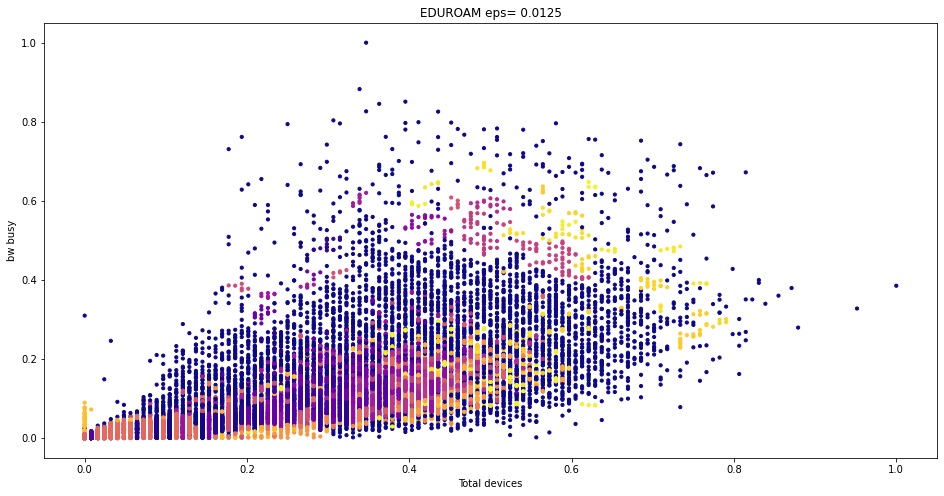

In [66]:
# 2nd try with eps = 0.0125
# Epsilon 
e_eduroam = 0.0125

# DBSCAN
dbscan_eduroam = DBSCAN(eps= e_eduroam, min_samples= n_eduroam)
cluster_eduroam = dbscan_eduroam.fit_predict(df_escalado_eduroam)

# Add to dataFrame
df_escalado_eduroam['Cluster'] = cluster_eduroam

# Asign x and y
x_eduroam = df_escalado_eduroam['total_devices'].values # total_devices
y_eduroam = df_escalado_eduroam['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("EDUROAM eps= 0.0125")
plt.scatter(x_eduroam, y_eduroam, c = cluster_eduroam, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of clusters (Eduroam)

In [67]:
copy_eduroam = pd.DataFrame()
copy_eduroam['bw_busy']=df_escalado_eduroam['bw_busy'].values
copy_eduroam['total_devices']=df_escalado_eduroam['total_devices'].values
copy_eduroam['label'] = cluster_eduroam
cantidadGrupo_eduroam =  pd.DataFrame()
cantidadGrupo_eduroam['cantidad']=copy_eduroam.groupby('label').size()
cantidadGrupo_eduroam

,cantidad
label,
-1,391
0,95
1,3330
2,194
3,9
...,...
686,10
687,5
688,4


### Compare different epsilons (Ditwifi)
* eps = 0.0025
* eps = 0.0125 

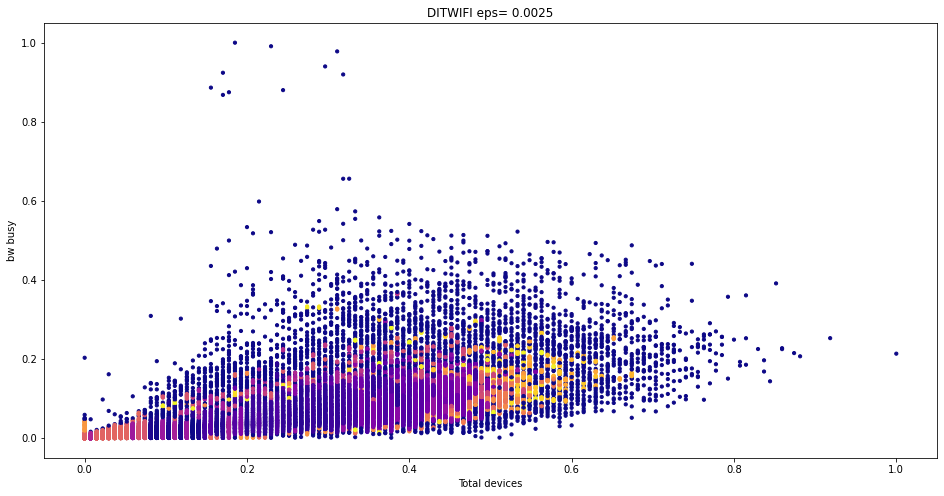

In [68]:
# 1st try with eps = 0.008
# Epsilon 
e_ditwifi = 0.0025

# DBSCAN
dbscan_ditwifi = DBSCAN(eps= e_ditwifi, min_samples= n_ditwifi)
cluster_ditwifi = dbscan_ditwifi.fit_predict(df_escalado_ditwifi)

# Add to dataFrame
df_escalado_ditwifi['Cluster'] = cluster_ditwifi

# Asign x and y
x_ditwifi = df_escalado_ditwifi['total_devices'].values # total_devices
y_ditwifi = df_escalado_ditwifi['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("DITWIFI eps= 0.0025")
plt.scatter(x_ditwifi, y_ditwifi, c = cluster_ditwifi, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of clusters (Ditwifi)

In [69]:
copy_ditwifi = pd.DataFrame()
copy_ditwifi['bw_busy']=df_escalado_ditwifi['bw_busy'].values
copy_ditwifi['total_devices']=df_escalado_ditwifi['total_devices'].values
copy_ditwifi['label'] = cluster_ditwifi
cantidadGrupo_ditwifi =  pd.DataFrame()
cantidadGrupo_ditwifi['cantidad']=copy_ditwifi.groupby('label').size()
cantidadGrupo_ditwifi

,cantidad
label,
-1,3318
0,201
1,4
2,5
3,4
...,...
561,5
562,4
563,4


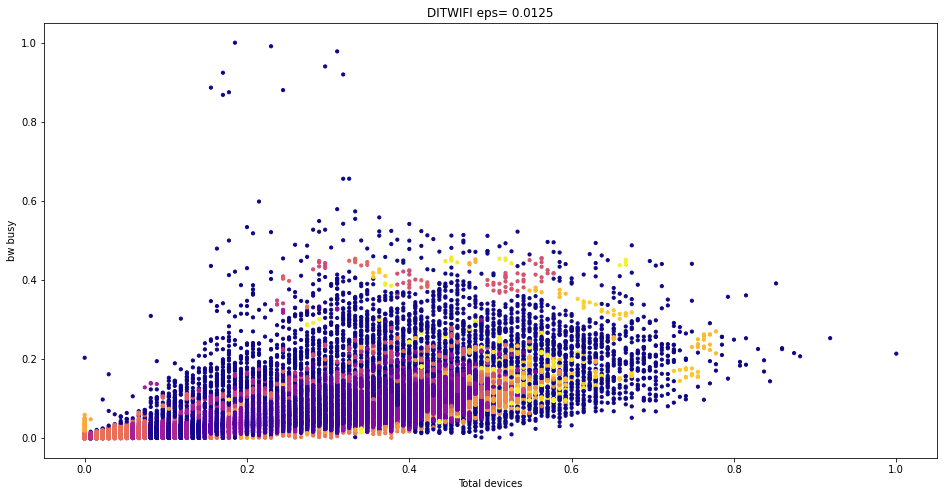

In [70]:
# 2nd try with eps = 0.0125
# Epsilon 
e_ditwifi = 0.0125

# DBSCAN
dbscan_ditwifi = DBSCAN(eps= e_ditwifi, min_samples= n_ditwifi)
cluster_ditwifi = dbscan_ditwifi.fit_predict(df_escalado_ditwifi)

# Add to dataFrame
df_escalado_ditwifi['Cluster'] = cluster_ditwifi

# Asign x and y
x_ditwifi = df_escalado_ditwifi['total_devices'].values # total_devices
y_ditwifi = df_escalado_ditwifi['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("DITWIFI eps= 0.0125")
plt.scatter(x_ditwifi, y_ditwifi, c = cluster_ditwifi, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of clusters (Ditwifi)

In [71]:
copy_ditwifi = pd.DataFrame()
copy_ditwifi['bw_busy']=df_escalado_ditwifi['bw_busy'].values
copy_ditwifi['total_devices']=df_escalado_ditwifi['total_devices'].values
copy_ditwifi['label'] = cluster_ditwifi
cantidadGrupo_ditwifi =  pd.DataFrame()
cantidadGrupo_ditwifi['cantidad']=copy_ditwifi.groupby('label').size()
cantidadGrupo_ditwifi

,cantidad
label,
-1,314
0,201
1,4
2,2760
3,5
...,...
587,4
588,5
589,5


### Compare different epsilons (Eduroam & Ditwifi)
* eps = 0.01
* eps = 0.05

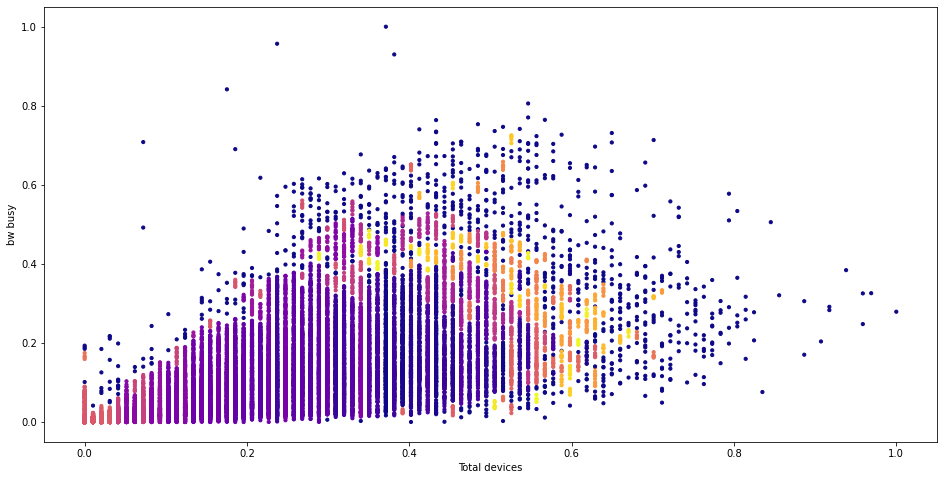

In [72]:
# 1st try with eps = 0.01
# Epsilon 
e = 0.01

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_escalado['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of cluster

In [73]:
copy = pd.DataFrame()
copy['bw_busy']=df_escalado['bw_busy'].values
copy['total_devices']=df_escalado['total_devices'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,906
0,352
1,50
2,7
3,222
...,...
221,4
222,4
223,6


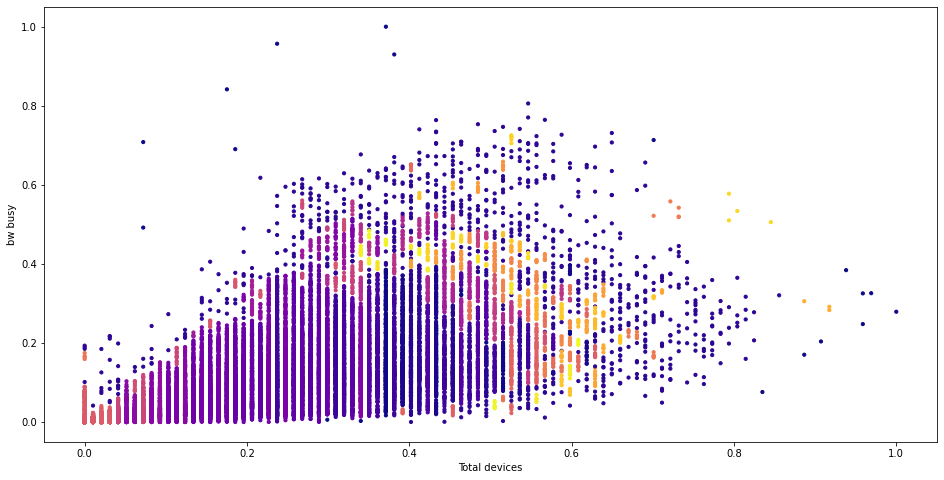

In [74]:
# 2nd try with eps = 0.08
# Epsilon 
e = 0.05

# DBSCAN
dbscan = DBSCAN(eps= e, min_samples= n)
cluster = dbscan.fit_predict(df_escalado)

# Add to dataFrame
df_escalado['Cluster'] = cluster

# Asign x and y
x = df_escalado['total_devices'].values # total_devices
y = df_escalado['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.scatter(x, y, c = cluster, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot

### Count of cluster

In [75]:
copy = pd.DataFrame()
copy['bw_busy']=df_escalado['bw_busy'].values
copy['total_devices']=df_escalado['total_devices'].values
copy['label'] = cluster
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,25
0,352
1,50
2,7
3,222
...,...
224,6
225,7
226,4
